In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [48]:
def GetData():
    advertiser_name_list = ["卫仕-千川-自投", "卫仕-千川-邦盟", "频度-卫仕小号", "卫仕nourse", "卫仕-千川-频度", "卫仕-千川-TJU", "卫仕-千川-自投一户（猫）", "卫仕-千川-自投一户（狗）", "卫仕-千川-谦行TJU"]
    df = pd.DataFrame(columns = ['id', 'advertiser_id', 'ad_id', 'time', 'stat_cost','show_cnt', 'ctr', 'cpm_platform', 'click_cnt', 'pay_order_count', 'create_order_amount', 'prepay_and_pay_order_roi', 'prepay_order_count', 'prepay_order_amount', 'create_order_count', 'pay_order_amount', 'create_order_roi', 'dy_follow', 'convert_cnt', 'convert_cost', 'convert_rate', 'dy_share', 'dy_comment', 'dy_like', 'live_pay_order_cost_per_order', 'luban_live_enter_cnt', 'live_watch_one_minute_count', 'live_fans_club_join_cnt', 'luban_live_slidecart_click_cnt', 'luban_live_click_product_cnt', 'luban_live_comment_cnt', 'luban_live_share_cnt', 'luban_live_gift_cnt', 'luban_live_gift_amount', 'create_time', 'update_time', 'class_id'])
    for advertiser_name in advertiser_name_list:
        fileLoc = "Data/task_data/convert_" + advertiser_name + ".csv"
        # 取前1000行数据
        temp = pd.read_csv(fileLoc, skiprows=0, nrows=2000)
#         print(temp)
        df = pd.concat([df, temp], ignore_index=True)
    
    data = df.drop(columns=['id', 'advertiser_id', 'ad_id', 'dy_share', 'dy_comment', 'dy_like', 'time', 'create_time', 'update_time', 'class_id'])
    # 检查是否有缺失值
#     print(data.isnull().any())
    data_array = np.array(data)
    data_list = data_array.tolist()
    label = df.loc[:, 'class_id']
    label_array = np.array(label)
    label_list = label_array.tolist()
#     print(data_list)
#     print(label_list)
    n_samples, n_features = data.shape
#     print(n_samples, n_features)
#     print(data)
#     print(label)
#     print(df)
    return data_list, label_list, n_samples, n_features

In [49]:
GetData()

       stat_cost show_cnt   ctr  cpm_platform click_cnt pay_order_count  \
0           0.00        0  0.00          0.00         0               0   
1           0.00        0  0.00          0.00         0               0   
2           0.00        0  0.00          0.00         0               0   
3           0.00        0  0.00          0.00         0               0   
4           0.72        0  0.00          0.00         0               0   
...          ...      ...   ...           ...       ...             ...   
11893       0.95        0  3.81        100.38         0               0   
11894       0.00        0  3.95         90.92         0               0   
11895       0.00        0  0.00          0.00         0               0   
11896       0.00        1  2.50         70.50         0               0   
11897       0.00        0  0.00        203.75         0               0   

       create_order_amount  prepay_and_pay_order_roi prepay_order_count  \
0                      0

([[0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0.0,
   0.0,
   0,
   0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0.0,
   0.0,
   0,
   0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0.0,
   0.0,
   0,
   0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0.0,
   0.0,
   0,
   0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.72,
   0,
   0.0,
   0.0,
   0,
   0,
   0.0,
   0.0,
   0,
   0.0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.0,
   1,
   0.0,
   720.0,
   0,
   0,
   0.0,
   0.0,
   0,
   0.0,


In [50]:
def PlotEmbedding(data, label, n_samples):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    
    colors = list()
    color_list = np.random.randint(100, size=9).tolist()
    for i in range(0, len(label)):
        colors.append(color_list[label[i]])
#     print(colors)
    
    type1_x = list()
    type1_y = list()
    type2_x = list()
    type2_y = list()
    type3_x = list()
    type3_y = list()
    type4_x = list()
    type4_y = list()
    type5_x = list()
    type5_y = list()
    type6_x = list()
    type6_y = list()
    type7_x = list()
    type7_y = list()
    type8_x = list()
    type8_y = list()
    type9_x = list()
    type9_y = list()
    
    for i in range(len(label)):
        if label[i] == 1:
            type1_x.append(data[i, 0])
            type1_y.append(data[i, 1])
        if label[i] == 2:
            type2_x.append(data[i, 0])
            type2_y.append(data[i, 1])
        if label[i] == 3:
            type3_x.append(data[i, 0])
            type3_y.append(data[i, 1])
        if label[i] == 4:
            type4_x.append(data[i, 0])
            type4_y.append(data[i, 1])
        if label[i] == 5:
            type5_x.append(data[i, 0])
            type5_y.append(data[i, 1])
        if label[i] == 6:
            type6_x.append(data[i, 0])
            type6_y.append(data[i, 1])
        if label[i] == 7:
            type7_x.append(data[i, 0])
            type7_y.append(data[i, 1])
        if label[i] == 8:
            type8_x.append(data[i, 0])
            type8_y.append(data[i, 1])
        if label[i] == 9:
            type9_x.append(data[i, 0])
            type9_y.append(data[i, 1])
    
    type1 = ax.scatter(type1_x, type1_y, c='#0000FF', marker='o', s=10)
    type2 = ax.scatter(type2_x, type2_y, c='#00FF00', marker='o', s=10)
    type3 = ax.scatter(type3_x, type3_y, c='#FFFF00', marker='o', s=10)
    type4 = ax.scatter(type4_x, type4_y, c='#FF0000', marker='o', s=10)
    type5 = ax.scatter(type5_x, type5_y, c='#FF00FF', marker='o', s=10)
    type6 = ax.scatter(type6_x, type6_y, c='#00BFFF', marker='o', s=10)
    type7 = ax.scatter(type7_x, type7_y, c='#90EE90', marker='o', s=10)
    type8 = ax.scatter(type8_x, type8_y, c='#9B30FF', marker='o', s=10)
    type9 = ax.scatter(type9_x, type9_y, c='#FFA500', marker='o', s=10)
    
    ax.legend((type1, type2, type3, type4, type5, type6, type7, type8, type9), ('卫仕-千川-自投', '卫仕-千川-邦盟', '频度-卫仕小号', '卫仕nourse', '卫仕-千川-频度', '卫仕-千川-TJU', '卫仕-千川-自投一户（猫）', '卫仕-千川-自投一户（狗）', '卫仕-千川-谦行TJU'), loc="upper right")
    
#     scatter = ax.scatter(data[:, 0], data[:, 1], c=colors, marker='o', s=10)
#     # 按照散点图中标记的colors生成legend
#     legendClass = ax.legend(*scatter.legend_elements(), loc="upper right", title="classes", ncol=4)
#     ax.add_artist(legendClass)
    
#     for i in range(n_samples):
#         plt.text(data[i, 0], data[i, 1], str(label[i]), color=plt.cm.Set1(label[i] / 10), fontdict={'weight': 'bold', 'size': 7})
    
    plt.xticks()
    plt.yticks()
    plt.title("t-SNE Embedding", fontsize=14)
    return fig

In [51]:
# 训练函数
def Train():
    data, label, n_samples, n_features = GetData()
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    result = tsne.fit_transform(data)
    return result, label, n_samples, n_features

In [52]:
result, label, n_samples, n_features = Train()

       stat_cost show_cnt   ctr  cpm_platform click_cnt pay_order_count  \
0           0.00        0  0.00          0.00         0               0   
1           0.00        0  0.00          0.00         0               0   
2           0.00        0  0.00          0.00         0               0   
3           0.00        0  0.00          0.00         0               0   
4           0.72        0  0.00          0.00         0               0   
...          ...      ...   ...           ...       ...             ...   
11893       0.95        0  3.81        100.38         0               0   
11894       0.00        0  3.95         90.92         0               0   
11895       0.00        0  0.00          0.00         0               0   
11896       0.00        1  2.50         70.50         0               0   
11897       0.00        0  0.00        203.75         0               0   

       create_order_amount  prepay_and_pay_order_roi prepay_order_count  \
0                      0

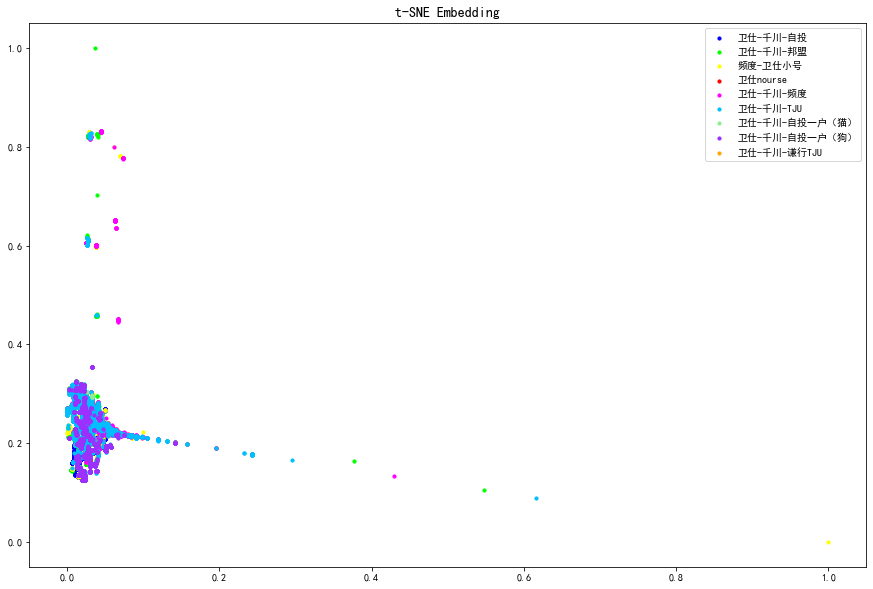

In [53]:
fig = PlotEmbedding(result, label, n_samples)
plt.show()